In [7]:
import csv

# Dati di esempio
dimensioni = [100, 150, 200, 250, 300]
prezzi = [150000, 200000, 250000, 300000, 350000]

# Scrivi i dati su un file CSV
with open('dati_casa.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Dimensioni', 'Prezzo'])  # Scrivi l'intestazione
    for d, p in zip(dimensioni, prezzi):
        writer.writerow([d, p])

print("File CSV 'dati_casa.csv' creato con successo.")


File CSV 'dati_casa.csv' creato con successo.


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('dati_casa.csv')
display(df)

display(df.isnull().sum())

df.describe()

Dimensioni  Prezzo
0         100  150000
1         150  200000
2         200  250000
3         250  300000
4         300  350000

Dimensioni    0
Prezzo        0
dtype: int64

Dimensioni         Prezzo
count    5.000000       5.000000
mean   200.000000  250000.000000
std     79.056942   79056.941504
min    100.000000  150000.000000
25%    150.000000  200000.000000
50%    200.000000  250000.000000
75%    250.000000  300000.000000
max    300.000000  350000.000000

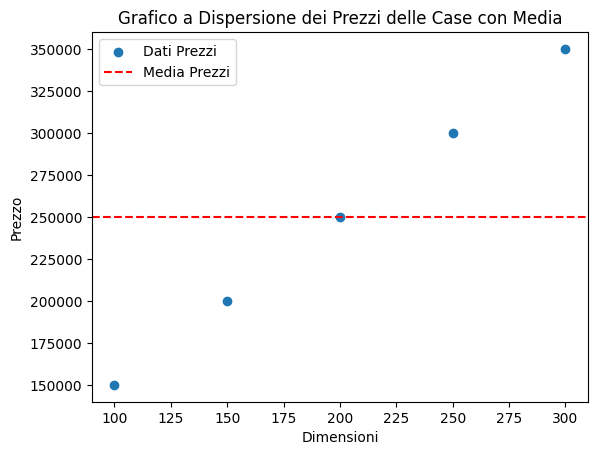

In [11]:
# Preparazione dei dati
# Estrai i dati
dimensioni = df['Dimensioni']
prezzi = df['Prezzo']

# Calcola la media dei prezzi
media_prezzi = prezzi.mean()

# Crea un grafico a dispersione
plt.scatter(dimensioni, prezzi, label='Dati Prezzi')

# Aggiungi una retta per la media dei prezzi
plt.axhline(media_prezzi, color='red', linestyle='--', label='Media Prezzi')

# Aggiungi etichette agli assi e una legenda
plt.xlabel('Dimensioni')
plt.ylabel('Prezzo')
plt.legend()

# Aggiungi un titolo al grafico
plt.title('Grafico a Dispersione dei Prezzi delle Case con Media')

# Mostra il grafico
plt.show()


In [17]:
# Selezione delle caratteristiche
X = df['Dimensioni']  # feature
y = df['Prezzo']      # target

In [18]:
# Split del ds per training e testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Reshape X_train e X_test
X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

# Applica lo scaling
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)


In [22]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()


In [29]:
model.fit(X_train_scaled, y_train)


LinearRegression()

In [30]:
from sklearn.metrics import r2_score, mean_squared_error

# Effettua previsioni sui dati di test
y_pred = model.predict(X_test_scaled)

# Calcola l'R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

# Calcola l'errore quadratico medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')


R-squared: nan
MSE: 8.470329472543003e-22


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [31]:
# Esempio di previsione su nuovi dati
nuove_dimensioni = [175, 225, 275]
nuove_dimensioni_scaled = scaler.transform(np.array(nuove_dimensioni).reshape(-1, 1))
previsioni = model.predict(nuove_dimensioni_scaled)
print(f'Previsioni: {previsioni}')


Previsioni: [225000. 275000. 325000.]


In [45]:
import matplotlib.pyplot as plt

# Effettua previsioni sui dati di test
y_pred = model.predict(X_test_scaled)

In [46]:
# Stampa i valori reali e le previsioni
for real, pred in zip(y_test, y_pred):
    print(f'Valore Reale: {real}, Previsione: {pred}')


Valore Reale: 200000, Previsione: 199999.99999999997


In [37]:
import csv
import random

# Crea dati di esempio con dimensioni e prezzi casuali
dimensioni = [random.randint(100, 300) for _ in range(100)]  # 100 dimensioni casuali tra 100 e 300
prezzi = [d * 1000 + random.randint(-5000, 5000) for d in dimensioni]  # Prezzi approssimativamente correlati alle dimensioni

# Scrivi i dati su un file CSV
with open('dati_casa_corposi.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Dimensioni', 'Prezzo'])  # Scrivi l'intestazione
    for d, p in zip(dimensioni, prezzi):
        writer.writerow([d, p])


df_new = pd.read_csv('dati_casa_corposi.csv')


In [40]:
X_new = df_new['Dimensioni']
y_new = df_new['Prezzo']
X_new = X_new.to_numpy().reshape(-1, 1)
X_new_scaled = scaler.transform(X_new)
y_new_pred = model.predict(X_new_scaled)

from sklearn.metrics import r2_score, mean_squared_error

# Calcola l'R-squared e l'errore quadratico medio per il nuovo dataset
r2_new = r2_score(y_new, y_new_pred)
mse_new = mean_squared_error(y_new, y_new_pred)

# Confronta le metriche con quelle ottenute sul dataset originale
print(f'R-squared (Nuovo Dataset): {r2_new}')
print(f'MSE (Nuovo Dataset): {mse_new}')


R-squared (Nuovo Dataset): 0.08552891467786983
MSE (Nuovo Dataset): 2544819357.639999


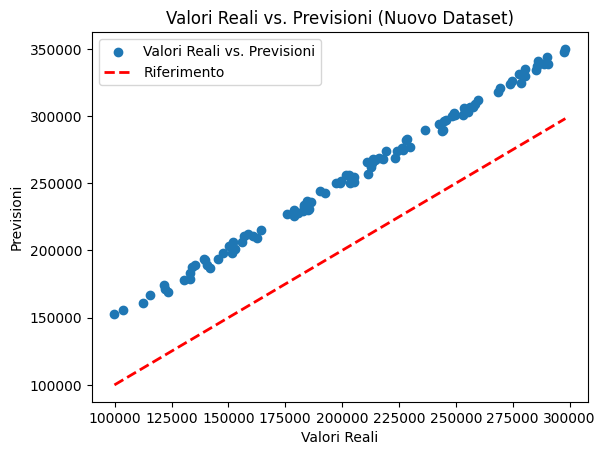

In [42]:
import matplotlib.pyplot as plt

# Crea un grafico a dispersione per confrontare valori reali e previsioni nel nuovo dataset
plt.scatter(y_new, y_new_pred, label='Valori Reali vs. Previsioni')
plt.xlabel('Valori Reali')
plt.ylabel('Previsioni')
plt.title('Valori Reali vs. Previsioni (Nuovo Dataset)')

# Aggiungi una retta di riferimento (y = x) per il confronto
plt.plot([min(y_new), max(y_new)], [min(y_new), max(y_new)], color='red', linestyle='--', lw=2, label='Riferimento')

# Aggiungi la legenda
plt.legend()

plt.show()


In [50]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_new, y_new_pred)
rmse = np.sqrt(mse)

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MSE: 2544819357.639999
RMSE: 50446.20260871971
